<a href="https://colab.research.google.com/github/Thayyebsalim/music_analyisis/blob/master/Music_Sentimental_analysis_NLP_by_Tone_and_Lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have x number of song lyrics scraped

The questions we face are of such
* Use Linguisitic transforms
* Use premade libraries to determine sentiment analysis
* What are the accuracy after using linguistic transforms
* What are the accuracy of the libraries with and without linguistic transforms
* Difference in the accuracy min and max of each library
* Visualization of each library, each song with each library





Ideas 
Heat map style of song sentiment 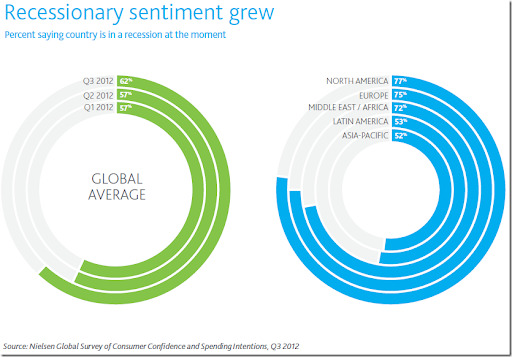ment 

# Intro

The idea of this code is to find the mood of the song in any way possible helping us to segregate songs better.

1.   First part is gonna be scraping the lyrics from any website or API 
2.   Finding the vibe of the song with sentimental analysis

To test the results we input the song sentiment with 1 being happy and 0 being melancholy. This is compared with the test result and gives you a detailed overview of with each library prediction 

In [ ]:
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]


In [ ]:
from textblob import TextBlob

In [ ]:
import pandas as pd 
import numpy as np
import re
import time
import string

#Scraping
We need to scrape the song lyrics from websites or API to use here

I am using selenium here and the speed is not the best at the moment so I might switch to scrapy or use an API

In [ ]:
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 59 not upgraded.
Need to get 81.0 MB of archives.
After this operation, 273 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 87.0.4280.66-0ubuntu0.18.04.1 [1,122 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 87.0.4280.66-0ubuntu0.18.04.1 [71.7 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser-l10n all 87.0.428

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options

In [ ]:
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')


def get_track_link(track_name): # Gets track name from user and converts it so that we can use it in a link
  #track_name = input("Enter a track name: ")
  track_name_link = track_name.rstrip().replace(" ","%20").lower()
  return track_name_link


def scrape_tracklist(track_link): # Scrapes the page for list of tracks with similar names or such 
  driver = webdriver.Chrome(chrome_options=chrome_options)
  driver.get("https://www.musixmatch.com/search/" + track_link + "/tracks")
  element = driver.find_element_by_class_name("box-content")
  link_list = [i.get_attribute('href') for i in element.find_elements_by_tag_name('a')]
  driver.close()
  lyric_links=[i for i in link_list if re.search("/lyrics/",i)] #could do it in one line but for the sake of clarity, I'm gonna do two
  lyric_links=[i for i in lyric_links if not re.search("/add",i)]
  return lyric_links


def scrape_lyrics(lyric_links_list,choice): # Scrapes the lyrics element
  driver = webdriver.Chrome(chrome_options=chrome_options)
  driver.get(lyric_links_list[choice])
  lyric_elem=driver.find_elements_by_class_name('mxm-lyrics__content')
  lyric_elem= [i.find_element_by_tag_name('span') for i in lyric_elem] 
  lyric_elem= [i.get_attribute('innerHTML') for i in lyric_elem]
  driver.close()
  return lyric_elem


def select_track(artist_track_list): # Lets the user select a track
  sel=0
  for track in artist_track_list:
    print(f"{track[0]+1} {track[1]} - {track[2]}")
  sel=int(input('Enter the number of your desired track: '))-1
  return sel


def get_lyric_element(track_link,choice=0): # Cleans up the lyric element and returns a cleaned list(array) with just lyrics inside
  lyric_links_list = scrape_tracklist(track_link)
  print(lyric_links_list)
  artist_track_list = [[lyric_links_list.index(x), x.split("/")[4],x.split('/')[5]] for x in lyric_links_list]
  print(artist_track_list)
  if len(artist_track_list) > 1 and choice != "default":
    choice = select_track(artist_track_list)
  elif len(artist_track_list) == 0 :
    return "Sorry! no such song"
  else:
    choice=0
  lyric_element = scrape_lyrics(lyric_links_list,choice)
  return " ".join(lyric_element)



The first part is done, web scraper should work fine. I did not implement error cases for now becuase I want to focus on the next two parts of the project


In [ ]:
def filter_raw_lyrics(raw_lyr): #The scraped element has blanks and \n's lets filter those 
  return [i for i in raw_lyr.split("\n") if i != '']

#joiner
def convert_arr_to_str(arr):
  return " ".join(arr)

Well lets have some fun with the lyrics

We will be duplicating the lyrics so as to have versions with stop words, lemmatizers and contractions removed per duplication. We will also have versions with combined liguistic alterations done to it.



In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("vader_lexicon")
nltk.download("brown")
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def swfilter(word): #function we use in filter()
  return word not in stopwords.words()

def remove_stopword(lyr_arr):
  return [" ".join(filter(swfilter,sentence.split())) for sentence in lyr_arr]

In [ ]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def map_contraction(word): #function we use in map()
  word=word.lower()
  if word in contractions:
    return contractions[word]
  else: 
    return word

def remove_contraction(lyr_arr):
  return [" ".join(map(map_contraction, sentence.split())) for sentence in lyr_arr]

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def map_lemmatize(word):
  return wordnet_lemmatizer.lemmatize(word, pos="v")

def lemmatize_words(lyr_arr):
  return [" ".join(map(map_lemmatize, sentence.split())) for sentence in lyr_arr]


Next we have to tackle the sentimantal analysis part. We aim to try bag of words then use NLTK on every line might be slow but I like to give prominence to accuracy

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
def get_vader_score(lyr):
  # Polarity score returns dictionary
  sentiment = sia.polarity_scores(lyr)
  return sentiment['compound']
  """
  print(ss)
  print(ss['compound'])
  ss.pop("compound")
  print("ss=",ss)
  x=sorted(ss.values(), reverse=True)[0]
  for i in ss.keys():
    if ss[i]==x:
      if "i" == "neg":
        ss[i]=-(ss[i])
      print(ss[i])
  """  

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def get_textblob_score(lyr):
  blob=TextBlob(lyr)
  return blob.polarity

In [ ]:
!pip install watson_developer_cloud
import sys
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, SentimentOptions, CategoriesOptions
natural_language_understanding = NaturalLanguageUnderstandingV1(                                         
    version='2018-11-16',
    iam_apikey="hzkkbjivKNHfoi3cFlMBOPG6-YHLc-7CAQKwXn8Rt7JT", 
    url="https://api.eu-gb.natural-language-understanding.watson.cloud.ibm.com/instances/512aa79c-a8ba-43fa-b9d5-a4382099b06f" # paste the url here
    )
def get_watson_score(input_text): 
  try:
    response = natural_language_understanding.analyze (
    text = input_text,
    features = Features(sentiment=SentimentOptions())).get_result()
    res = response.get('sentiment').get('document').get('score')
    return res
  except Exception:
    exc_type, value, traceback = sys.exc_info()
    print("error",input_text,exc_type.__name__)
    return 0

     |████████████████████████████████| 256kB 4.3MB/s 
     |████████████████████████████████| 204kB 47.9MB/s 
  Created wheel for watson-developer-cloud: filename=watson_developer_cloud-2.10.1-cp37-none-any.whl size=252815 sha256=8c251b4e79799750023802e1ab9026b9884766446760f2f0f1d1a4a3de552312
  Stored in directory: /root/.cache/pip/wheels/ea/a7/19/fac0a408a586265eb374005308a7553d4494ab41b2fd88f5bc
Successfully built watson-developer-cloud


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  


In [ ]:
sentiment_score_fns=[get_textblob_score,get_vader_score]

Function definitions 


In [ ]:
# Returns all transformed arrays and further maps the arrays 

def get_lyric_arrays(lyr_arr):
  return [lyr_arr,
          remove_stopword(lyr_arr),
          remove_contraction(lyr_arr),
          lemmatize_words(lyr_arr),
          remove_contraction(remove_stopword(lyr_arr)),
          lemmatize_words(remove_stopword(lyr_arr)),
          remove_contraction(lemmatize_words(lyr_arr)),
          lemmatize_words(remove_contraction(remove_stopword(lyr_arr)))]

def get_lyrics(arr):
  return list(map(convert_arr_to_str,arr))


In [ ]:
def watson_min_words_arr(arr): #watson has minimum requirement to perform sentiment analysis
  x="" 
  watson_arr=[]
  for line in arr:
    if len(line.split())+len(x.split())<4:
      x=x+line+" "
      continue
    if x!= "" : line=x+line
    x=""
    watson_arr.append(line)
  return watson_arr 

In [ ]:
def mean_without_zero(arr):
  arr = [x for x in arr if x != 0]
  return np.mean(arr)

# Getting table with sentiment scores

In [ ]:
def get_df(lyr_arr):
  trans_lyr_arr=get_lyric_arrays(lyr_arr)
  trans_lyr=get_lyrics(trans_lyr_arr)
  df=pd.DataFrame(index=["Lyrics","SW","CO","LM","SW-CO","SW-LM","CO-LM","SW-CO-LM"],columns=["Textblob","Textblob per line","Textblob nonzero","Vader","Vader per line","Vader nonzero","Watson","Watson per line","Watson nonzero"])
  df["Textblob"]=list(map(get_textblob_score,trans_lyr))
  df["Vader"]=list(map(get_vader_score,trans_lyr))
  df["Watson"]=list(map(get_watson_score,trans_lyr))

  textblob_per_line=[]
  for trans in trans_lyr_arr:
    textblob_per_line.append(list(map(get_textblob_score,trans)))

  df["Textblob per line"]=list(map(np.mean,textblob_per_line))
  #textblob_per_line

  vader_per_line=[]
  for trans in trans_lyr_arr:
    vader_per_line.append(list(map(get_vader_score,trans)))

  df["Vader per line"]=list(map(np.mean,vader_per_line))
  #vader_per_line

  converted_watson_arr=list(map(watson_min_words_arr,trans_lyr_arr))

  watson_per_line=[]
  for trans in converted_watson_arr:
    print(trans)
    watson_per_line.append(list(map(get_watson_score,trans)))
    
  df["Watson per line"]=list(map(np.mean,watson_per_line))
  #watson_per_line

  df["Textblob nonzero"]=list(map(mean_without_zero,textblob_per_line))
  df["Vader nonzero"]=list(map(mean_without_zero,vader_per_line))
  df["Watson nonzero"]=list(map(mean_without_zero,watson_per_line))
  return df



# Putting it all together
We run our functions here, Change the list of song names to test
As for the accuracy please change the songsentiment list respective to the song list with 1 denoting positive sentiment and -1 denoting negative sentiment

In [ ]:
songs=["6 feet apart","allie x devil i know","khalid lovely","finneas break my heart again","sam smith to die for"]
song_arr=list(map(get_track_link,songs))
song_arr

['6%20feet%20apart',
 'allie%20x%20devil%20i%20know',
 'khalid%20lovely',
 'finneas%20break%20my%20heart%20again',
 'sam%20smith%20to%20die%20for']

In [ ]:
song_sentiment=[1,1,1,-1,1]

In [ ]:
elt_arr=[]
for i in song_arr:
  print(i)
  elt_arr.append(get_lyric_element(i,"default"))
elt_arr

6%20feet%20apart


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


['https://www.musixmatch.com/lyrics/Dror/6-Feet-Apart', 'https://www.musixmatch.com/lyrics/Pat-McCurdy/6-Feet-Apart', 'https://www.musixmatch.com/lyrics/Drew-Sky/6-Feet-Apart', 'https://www.musixmatch.com/lyrics/scotch-pond/Social-Distancing-6-Feet-Apart', 'https://www.musixmatch.com/lyrics/6-Feet-Apart/So-Hard-To-Have-Some-Fun', 'https://www.musixmatch.com/lyrics/6-Feet-Apart/Celebration-Mamma-s-Swing', 'https://www.musixmatch.com/lyrics/Mauvi-2/6-Feet-Apart', 'https://www.musixmatch.com/lyrics/ProVeracity-2/6-Feet-Apart', 'https://www.musixmatch.com/lyrics/Gracie/6-Feet-Apart', 'https://www.musixmatch.com/lyrics/Paulmontpellier/6-Feet-Apart', 'https://www.musixmatch.com/lyrics/Kepa-Seaward/6-Feet-Apart', 'https://www.musixmatch.com/lyrics/6-Feet-Apart/Pretending', 'https://www.musixmatch.com/lyrics/6-Feet-Apart/Oigo-Pasos-Afuera', 'https://www.musixmatch.com/lyrics/BandManMeen/6-Feet-Apart', 'https://www.musixmatch.com/lyrics/Andrew-Littleton/6-Feet-Apart-1', 'https://www.musixmatch.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: use options instead of chrome_options


allie%20x%20devil%20i%20know


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


['https://www.musixmatch.com/lyrics/Allie-X/Devil-I-Know']
[[0, 'Allie-X', 'Devil-I-Know']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: use options instead of chrome_options


khalid%20lovely


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


['https://www.musixmatch.com/lyrics/Billie-Eilish-feat-Khalid/lovely', 'https://www.musixmatch.com/lyrics/Billie-Eilish-feat-Khalid-Milli-Davis/Lovely-Acoustic-Cover', 'https://www.musixmatch.com/lyrics/Billie-Eilish-feat-Khalid-Paul-States/Lovely-Acoustic-Cover', 'https://www.musixmatch.com/lyrics/Billie-Eilish-feat-Khalid/lovely-Bonus-Track']
[[0, 'Billie-Eilish-feat-Khalid', 'lovely'], [1, 'Billie-Eilish-feat-Khalid-Milli-Davis', 'Lovely-Acoustic-Cover'], [2, 'Billie-Eilish-feat-Khalid-Paul-States', 'Lovely-Acoustic-Cover'], [3, 'Billie-Eilish-feat-Khalid', 'lovely-Bonus-Track']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: use options instead of chrome_options


finneas%20break%20my%20heart%20again


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


['https://www.musixmatch.com/lyrics/FINNEAS/Break-My-Heart-Again']
[[0, 'FINNEAS', 'Break-My-Heart-Again']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: use options instead of chrome_options


sam%20smith%20to%20die%20for


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


['https://www.musixmatch.com/lyrics/Sam-Smith/To-Die-For', 'https://www.musixmatch.com/lyrics/Sam-Smith/To-Die-For-Acoustic', 'https://www.musixmatch.com/lyrics/Sifare-Cover-Band/To-Die-For-Francesco-Digilio-Cover-by-Sam-Smith', 'https://www.musixmatch.com/lyrics/8-Bit-Arcade/To-Die-For-8-Bit-Sam-Smith-Emulation']
[[0, 'Sam-Smith', 'To-Die-For'], [1, 'Sam-Smith', 'To-Die-For-Acoustic'], [2, 'Sifare-Cover-Band', 'To-Die-For-Francesco-Digilio-Cover-by-Sam-Smith'], [3, '8-Bit-Arcade', 'To-Die-For-8-Bit-Sam-Smith-Emulation']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: use options instead of chrome_options


['',
 'I think I made a big mistake\nYou keep messing with my brain\nYou tell me, "Eat the whole cake," it\'s what I deserve Every time I take your lead, feels like a curse\nAnd every time I try to stop, feels even worse (Uh, uh)\n\nBaby, you\'re the devil I know (I know)\nBetter than the devil I don\'t (I don\'t)\nMaybe I could stop, but I won\'t (I won\'t)\n\'Cause baby you\'re the devil I know (I know)\nI know\n\nI could pretend that I\'m just praying now\nBut I\'m only on my knees\n\nI want to, wanna get free (Get free)\nBut staying with you is easier than leaving (Easy)\nFeels like a holiday breeze when we go out\n\'Cause you bring me to down my knees when push comes to shove\nGuess that\'s the price that you pay when you\'re in love (Uh, uh)\n\nBaby, you\'re the devil I know (I know)\nBetter than the devil I don\'t (I don\'t)\nMaybe I could stop, but I won\'t (I won\'t)\n\'Cause baby you\'re the devil I know (I know)\nI know\n\nI could pretend that I\'m just praying now\nBut I\'m

In [ ]:
getdffrom=list(map(filter_raw_lyrics,elt_arr))
getdffrom

[[],
 ['I think I made a big mistake',
  'You keep messing with my brain',
  'You tell me, "Eat the whole cake," it\'s what I deserve Every time I take your lead, feels like a curse',
  'And every time I try to stop, feels even worse (Uh, uh)',
  "Baby, you're the devil I know (I know)",
  "Better than the devil I don't (I don't)",
  "Maybe I could stop, but I won't (I won't)",
  "'Cause baby you're the devil I know (I know)",
  'I know',
  "I could pretend that I'm just praying now",
  "But I'm only on my knees",
  'I want to, wanna get free (Get free)',
  'But staying with you is easier than leaving (Easy)',
  'Feels like a holiday breeze when we go out',
  "'Cause you bring me to down my knees when push comes to shove",
  "Guess that's the price that you pay when you're in love (Uh, uh)",
  "Baby, you're the devil I know (I know)",
  "Better than the devil I don't (I don't)",
  "Maybe I could stop, but I won't (I won't)",
  "'Cause baby you're the devil I know (I know)",
  'I know',

In [ ]:
accuracy=list(map(get_df,getdffrom))

error  WatsonApiException
error  WatsonApiException
error  WatsonApiException
error  WatsonApiException
error  WatsonApiException
error  WatsonApiException
error  WatsonApiException
error  WatsonApiException
[]
[]
[]
[]
[]
[]
[]
[]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


['I think I made a big mistake', 'You keep messing with my brain', 'You tell me, "Eat the whole cake," it\'s what I deserve Every time I take your lead, feels like a curse', 'And every time I try to stop, feels even worse (Uh, uh)', "Baby, you're the devil I know (I know)", "Better than the devil I don't (I don't)", "Maybe I could stop, but I won't (I won't)", "'Cause baby you're the devil I know (I know)", "I know I could pretend that I'm just praying now", "But I'm only on my knees", 'I want to, wanna get free (Get free)', 'But staying with you is easier than leaving (Easy)', 'Feels like a holiday breeze when we go out', "'Cause you bring me to down my knees when push comes to shove", "Guess that's the price that you pay when you're in love (Uh, uh)", "Baby, you're the devil I know (I know)", "Better than the devil I don't (I don't)", "Maybe I could stop, but I won't (I won't)", "'Cause baby you're the devil I know (I know)", "I know I could pretend that I'm just praying now", "But I

In [ ]:
for i in accuracy:
  display(i)

,Textblob,Textblob per line,Textblob nonzero,Vader,Vader per line,Vader nonzero,Watson,Watson per line,Watson nonzero
Lyrics,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN
SW,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN
CO,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN
LM,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN
SW-CO,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN
SW-LM,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN
CO-LM,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN
SW-CO-LM,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN


,Textblob,Textblob per line,Textblob nonzero,Vader,Vader per line,Vader nonzero,Watson,Watson per line,Watson nonzero
Lyrics,0.241270,0.077431,0.275309,-0.9952,-0.204194,-0.261368,-0.753127,-0.402011,-0.402011
SW,0.321212,0.082292,0.329167,-0.9941,-0.219053,-0.280388,-0.825384,-0.535494,-0.535494
CO,0.187698,0.065712,0.233642,-0.9952,-0.204309,-0.261516,-0.786225,-0.462861,-0.462861
LM,0.213519,0.071962,0.230278,-0.9956,-0.219653,-0.270342,-0.741657,-0.351097,-0.363204
SW-CO,0.321212,0.082292,0.329167,-0.9947,-0.219169,-0.280536,-0.823897,-0.509882,-0.509882
SW-LM,0.279861,0.076823,0.273148,-0.9948,-0.234513,-0.288631,-0.823178,-0.526441,-0.526441
CO-LM,0.163519,0.060243,0.192778,-0.9956,-0.219941,-0.270696,-0.774183,-0.433654,-0.448607
SW-CO-LM,0.279861,0.076823,0.273148,-0.9951,-0.234800,-0.288985,-0.813583,-0.483133,-0.501716


,Textblob,Textblob per line,Textblob nonzero,Vader,Vader per line,Vader nonzero,Watson,Watson per line,Watson nonzero
Lyrics,0.369231,0.155556,0.42,0.9852,0.118122,0.245331,0.371954,-0.066104,-0.084466
SW,0.369231,0.155556,0.42,0.9803,0.133552,0.277377,0.677109,-0.048049,-0.060062
CO,0.369231,0.155556,0.42,0.9866,0.118122,0.245331,0.380714,-0.056975,-0.072801
LM,0.369231,0.155556,0.42,0.9852,0.118122,0.245331,0.329491,-0.089790,-0.121481
SW-CO,0.253846,0.100000,0.27,0.9910,0.133552,0.277377,0.596830,-0.009691,-0.013325
SW-LM,0.369231,0.155556,0.42,0.9803,0.133552,0.277377,0.659456,-0.080070,-0.106760
CO-LM,0.369231,0.155556,0.42,0.9866,0.118122,0.245331,0.338369,-0.080661,-0.109130
SW-CO-LM,0.253846,0.100000,0.27,0.9910,0.133552,0.277377,0.605822,0.011474,0.014849


,Textblob,Textblob per line,Textblob nonzero,Vader,Vader per line,Vader nonzero,Watson,Watson per line,Watson nonzero
Lyrics,0.224561,0.118468,0.337179,-0.8545,-0.013016,-0.022933,-0.404042,0.009739,0.014377
SW,0.250980,0.109459,0.311538,-0.5142,0.000997,0.001757,0.568377,0.202181,0.297325
CO,0.224561,0.118468,0.337179,-0.8545,-0.013016,-0.022933,-0.443357,-0.009590,-0.014614
LM,0.197708,0.110023,0.290774,-0.8581,-0.014411,-0.024236,-0.429307,0.015758,0.022205
SW-CO,0.250980,0.109459,0.311538,-0.5142,0.000997,0.001757,0.556194,0.197943,0.291092
SW-LM,0.219676,0.101014,0.266964,-0.5457,-0.000397,-0.000668,0.415648,0.200918,0.295467
CO-LM,0.197708,0.110023,0.290774,-0.8581,-0.014411,-0.024236,-0.473061,-0.003993,-0.005807
SW-CO-LM,0.219676,0.101014,0.266964,-0.5142,0.000676,0.001136,0.435937,0.200064,0.294212


,Textblob,Textblob per line,Textblob nonzero,Vader,Vader per line,Vader nonzero,Watson,Watson per line,Watson nonzero
Lyrics,0.071693,0.042063,0.108480,-0.9890,-0.106816,-0.201308,-0.562653,0.107593,0.147556
SW,0.211538,0.056122,0.211538,0.8146,0.001092,0.003147,0.314487,-0.047013,-0.088495
CO,0.071693,0.042063,0.108480,-0.9890,-0.106816,-0.201308,-0.520292,0.108637,0.148987
LM,0.121345,0.047052,0.121345,-0.9922,-0.128222,-0.179511,-0.521769,0.102407,0.136542
SW-CO,0.211538,0.056122,0.211538,0.8146,0.001092,0.003147,0.317754,-0.047013,-0.088495
SW-LM,0.322727,0.072449,0.322727,0.6298,-0.011180,-0.021069,0.336387,-0.073540,-0.123858
CO-LM,0.121345,0.047052,0.121345,-0.9922,-0.128222,-0.179511,-0.452838,0.103450,0.137934
SW-CO-LM,0.322727,0.072449,0.322727,0.6298,-0.011180,-0.021069,0.348411,-0.073505,-0.123798


In [ ]:
newset=["","","","",""]
for i in range(len(accuracy)):
  if song_sentiment[i]==1:
    newset[i]=(accuracy[i]+1)/2
  else:
    newset[i]=(accuracy[i]-1)/-2
  newset[i]=round(newset[i]*100,1)

In [ ]:
for i in newset:
  display(i)

,Textblob,Textblob per line,Textblob nonzero,Vader,Vader per line,Vader nonzero,Watson,Watson per line,Watson nonzero
Lyrics,24.2,47.0,19.0,8.2,48.8,45.4,98.8,63.9,68.7
SW,24.2,47.0,19.0,8.2,48.8,45.4,99.4,60.9,67.8
CO,24.2,47.0,19.0,8.2,48.8,45.4,98.3,63.7,68.4
LM,24.2,47.0,19.0,5.3,48.4,44.0,99.0,62.4,65.7
SW-CO,24.2,47.0,19.0,8.2,48.8,45.4,99.4,59.9,65.8
SW-LM,24.2,47.0,19.0,5.3,48.4,44.0,99.8,61.0,65.4
CO-LM,24.2,47.0,19.0,5.3,48.4,44.0,98.6,62.3,65.6
SW-CO-LM,24.2,47.0,19.0,3.0,47.7,38.9,98.8,58.2,61.4


,Textblob,Textblob per line,Textblob nonzero,Vader,Vader per line,Vader nonzero,Watson,Watson per line,Watson nonzero
Lyrics,56.6,52.2,56.0,5.2,48.9,47.0,73.8,50.5,50.9
SW,56.8,51.8,56.4,39.9,49.0,46.9,93.7,52.8,54.4
CO,56.6,52.2,56.0,5.2,48.9,47.0,74.4,49.4,49.1
LM,58.8,53.0,59.7,5.2,48.9,47.0,68.6,51.4,52.1
SW-CO,56.8,51.8,56.4,39.9,49.0,46.9,92.8,54.2,56.3
SW-LM,59.5,52.6,61.1,39.9,49.0,46.9,94.6,53.7,55.5
CO-LM,58.8,53.0,59.7,5.2,48.9,47.0,69.2,50.7,51.0
SW-CO-LM,59.5,52.6,61.1,18.2,48.4,45.0,94.8,56.2,58.5


,Textblob,Textblob per line,Textblob nonzero,Vader,Vader per line,Vader nonzero,Watson,Watson per line,Watson nonzero
Lyrics,43.3,49.1,46.9,97.7,51.5,53.5,90.3,53.7,59.4
SW,44.1,49.0,46.4,98.2,51.8,54.1,90.8,55.7,65.1
CO,43.3,49.1,46.9,98.2,51.5,53.5,89.9,53.0,57.3
LM,35.8,47.6,36.4,98.0,51.5,53.3,84.7,51.0,52.9
SW-CO,44.1,49.0,46.4,98.7,51.8,54.1,92.1,54.2,61.1
SW-LM,33.9,47.5,34.7,97.6,51.3,53.0,83.9,51.6,54.2
CO-LM,35.8,47.6,36.4,98.7,51.5,53.3,82.0,50.1,50.2
SW-CO-LM,33.9,47.5,34.7,98.4,51.3,53.0,82.2,50.0,50.1


,Textblob,Textblob per line,Textblob nonzero,Vader,Vader per line,Vader nonzero,Watson,Watson per line,Watson nonzero
Lyrics,44.6,50.9,56.2,98.8,52.4,53.6,11.4,46.9,45.8
SW,42.0,49.9,49.3,98.5,52.0,53.6,33.0,48.9,48.6
CO,44.6,50.9,56.2,98.8,52.4,53.6,12.4,54.0,55.2
LM,44.6,50.9,56.2,98.8,52.4,53.6,10.1,53.1,54.2
SW-CO,42.0,49.9,49.3,98.5,52.0,53.6,13.3,56.5,57.8
SW-LM,42.0,49.9,49.3,98.5,52.0,53.5,31.5,49.7,49.7
CO-LM,44.6,50.9,56.2,98.8,52.4,53.6,14.3,59.6,62.6
SW-CO-LM,42.0,49.9,49.3,98.5,52.0,53.5,31.6,63.4,67.1


,Textblob,Textblob per line,Textblob nonzero,Vader,Vader per line,Vader nonzero,Watson,Watson per line,Watson nonzero
Lyrics,76.2,70.1,75.9,100.0,60.8,71.9,87.5,71.2,71.2
SW,79.7,70.9,78.5,100.0,61.0,72.3,99.6,78.0,80.1
CO,76.4,70.3,76.2,100.0,60.8,71.9,90.3,71.4,71.4
LM,76.2,70.1,75.9,100.0,60.8,71.9,88.1,71.3,71.3
SW-CO,79.7,70.9,78.5,100.0,61.0,72.3,99.6,80.5,85.3
SW-LM,79.7,70.9,78.5,100.0,61.0,72.3,99.6,78.1,80.2
CO-LM,76.4,70.3,76.2,100.0,60.8,71.9,90.8,71.5,71.5
SW-CO-LM,79.7,70.9,78.5,100.0,61.0,72.3,99.6,80.5,85.3


# Min, Max and Mean

In [ ]:
def get_min_max(df):
  min_max_df=pd.DataFrame(columns=["Textblob min","Textblob max","Vader min","Vader max","Watson min","Watson max"])
  for index in range(3):
    min_max_df[min_max_df.columns[index*2]]=df.iloc[:,index*3:(index*3)+3].min(axis=1)
    min_max_df[min_max_df.columns[(index*2)+1]]=df.iloc[:,index*3:(index*3)+3].max(axis=1)
  return min_max_df

In [ ]:
lib_min_max=list(map(get_min_max,newset))
for df in lib_min_max: display(df) 

,Textblob min,Textblob max,Vader min,Vader max,Watson min,Watson max
Lyrics,19.0,47.0,8.2,48.8,63.9,98.8
SW,19.0,47.0,8.2,48.8,60.9,99.4
CO,19.0,47.0,8.2,48.8,63.7,98.3
LM,19.0,47.0,5.3,48.4,62.4,99.0
SW-CO,19.0,47.0,8.2,48.8,59.9,99.4
SW-LM,19.0,47.0,5.3,48.4,61.0,99.8
CO-LM,19.0,47.0,5.3,48.4,62.3,98.6
SW-CO-LM,19.0,47.0,3.0,47.7,58.2,98.8


,Textblob min,Textblob max,Vader min,Vader max,Watson min,Watson max
Lyrics,52.2,56.6,5.2,48.9,50.5,73.8
SW,51.8,56.8,39.9,49.0,52.8,93.7
CO,52.2,56.6,5.2,48.9,49.1,74.4
LM,53.0,59.7,5.2,48.9,51.4,68.6
SW-CO,51.8,56.8,39.9,49.0,54.2,92.8
SW-LM,52.6,61.1,39.9,49.0,53.7,94.6
CO-LM,53.0,59.7,5.2,48.9,50.7,69.2
SW-CO-LM,52.6,61.1,18.2,48.4,56.2,94.8


,Textblob min,Textblob max,Vader min,Vader max,Watson min,Watson max
Lyrics,43.3,49.1,51.5,97.7,53.7,90.3
SW,44.1,49.0,51.8,98.2,55.7,90.8
CO,43.3,49.1,51.5,98.2,53.0,89.9
LM,35.8,47.6,51.5,98.0,51.0,84.7
SW-CO,44.1,49.0,51.8,98.7,54.2,92.1
SW-LM,33.9,47.5,51.3,97.6,51.6,83.9
CO-LM,35.8,47.6,51.5,98.7,50.1,82.0
SW-CO-LM,33.9,47.5,51.3,98.4,50.0,82.2


,Textblob min,Textblob max,Vader min,Vader max,Watson min,Watson max
Lyrics,44.6,56.2,52.4,98.8,11.4,46.9
SW,42.0,49.9,52.0,98.5,33.0,48.9
CO,44.6,56.2,52.4,98.8,12.4,55.2
LM,44.6,56.2,52.4,98.8,10.1,54.2
SW-CO,42.0,49.9,52.0,98.5,13.3,57.8
SW-LM,42.0,49.9,52.0,98.5,31.5,49.7
CO-LM,44.6,56.2,52.4,98.8,14.3,62.6
SW-CO-LM,42.0,49.9,52.0,98.5,31.6,67.1


,Textblob min,Textblob max,Vader min,Vader max,Watson min,Watson max
Lyrics,70.1,76.2,60.8,100.0,71.2,87.5
SW,70.9,79.7,61.0,100.0,78.0,99.6
CO,70.3,76.4,60.8,100.0,71.4,90.3
LM,70.1,76.2,60.8,100.0,71.3,88.1
SW-CO,70.9,79.7,61.0,100.0,80.5,99.6
SW-LM,70.9,79.7,61.0,100.0,78.1,99.6
CO-LM,70.3,76.4,60.8,100.0,71.5,90.8
SW-CO-LM,70.9,79.7,61.0,100.0,80.5,99.6


In [ ]:
def get_mean(df):
  mean_df=pd.DataFrame(columns=["Textblob","Vader","Watson"])
  for index,col_name in enumerate(mean_df.columns):
    index=index*3
    mean_df[col_name]=df.iloc[:,index:index+3].mean(axis=1)
  return mean_df

In [ ]:
lib_mean=list(map(get_mean,newset))
for df in lib_mean: display(round(df,2)) 

,Textblob,Vader,Watson
Lyrics,30.07,34.13,77.13
SW,30.07,34.13,76.03
CO,30.07,34.13,76.80
LM,30.07,32.57,75.70
SW-CO,30.07,34.13,75.03
SW-LM,30.07,32.57,75.40
CO-LM,30.07,32.57,75.50
SW-CO-LM,30.07,29.87,72.80


,Textblob,Vader,Watson
Lyrics,54.93,33.70,58.40
SW,55.00,45.27,66.97
CO,54.93,33.70,57.63
LM,57.17,33.70,57.37
SW-CO,55.00,45.27,67.77
SW-LM,57.73,45.27,67.93
CO-LM,57.17,33.70,56.97
SW-CO-LM,57.73,37.20,69.83


,Textblob,Vader,Watson
Lyrics,46.43,67.57,67.80
SW,46.50,68.03,70.53
CO,46.43,67.73,66.73
LM,39.93,67.60,62.87
SW-CO,46.50,68.20,69.13
SW-LM,38.70,67.30,63.23
CO-LM,39.93,67.83,60.77
SW-CO-LM,38.70,67.57,60.77


,Textblob,Vader,Watson
Lyrics,50.57,68.27,34.70
SW,47.07,68.03,43.50
CO,50.57,68.27,40.53
LM,50.57,68.27,39.13
SW-CO,47.07,68.03,42.53
SW-LM,47.07,68.00,43.63
CO-LM,50.57,68.27,45.50
SW-CO-LM,47.07,68.00,54.03


,Textblob,Vader,Watson
Lyrics,74.07,77.57,76.63
SW,76.37,77.77,85.90
CO,74.30,77.57,77.70
LM,74.07,77.57,76.90
SW-CO,76.37,77.77,88.47
SW-LM,76.37,77.77,85.97
CO-LM,74.30,77.57,77.93
SW-CO-LM,76.37,77.77,88.47


In [ ]:
for i in newset:
  i["mean_row"]=i.mean(axis=1)
  i["max_row"]=i.max(axis=1)

display(newset[0])

,Textblob,Textblob per line,Textblob nonzero,Vader,Vader per line,Vader nonzero,Watson,Watson per line,Watson nonzero,mean_row,max_row
Lyrics,24.2,47.0,19.0,8.2,48.8,45.4,98.8,63.9,68.7,47.111111,98.8
SW,24.2,47.0,19.0,8.2,48.8,45.4,99.4,60.9,67.8,46.744444,99.4
CO,24.2,47.0,19.0,8.2,48.8,45.4,98.3,63.7,68.4,47.000000,98.3
LM,24.2,47.0,19.0,5.3,48.4,44.0,99.0,62.4,65.7,46.111111,99.0
SW-CO,24.2,47.0,19.0,8.2,48.8,45.4,99.4,59.9,65.8,46.411111,99.4
SW-LM,24.2,47.0,19.0,5.3,48.4,44.0,99.8,61.0,65.4,46.011111,99.8
CO-LM,24.2,47.0,19.0,5.3,48.4,44.0,98.6,62.3,65.6,46.044444,98.6
SW-CO-LM,24.2,47.0,19.0,3.0,47.7,38.9,98.8,58.2,61.4,44.244444,98.8


In [ ]:
i=lib_min_max[0]
for f in range(1,len(lib_min_max)):
  i=i+lib_min_max[f]

i=i/5
i

,Textblob min,Textblob max,Vader min,Vader max,Watson min,Watson max
Lyrics,45.84,57.02,35.62,78.84,50.14,79.46
SW,45.56,56.48,42.58,78.90,56.08,86.48
CO,45.88,57.06,35.62,78.94,49.92,81.62
LM,44.50,57.34,35.04,78.82,49.24,78.92
SW-CO,45.56,56.48,42.58,79.00,52.42,88.34
SW-LM,43.68,57.04,41.90,78.70,55.18,85.52
CO-LM,44.54,57.38,35.04,78.96,49.78,80.64
SW-CO-LM,43.68,57.04,37.10,78.60,55.30,88.50


In [ ]:
display(i)

,Textblob min,Textblob max,Vader min,Vader max,Watson min,Watson max
Lyrics,45.84,57.02,35.62,78.84,50.14,79.46
SW,45.56,56.48,42.58,78.90,56.08,86.48
CO,45.88,57.06,35.62,78.94,49.92,81.62
LM,44.50,57.34,35.04,78.82,49.24,78.92
SW-CO,45.56,56.48,42.58,79.00,52.42,88.34
SW-LM,43.68,57.04,41.90,78.70,55.18,85.52
CO-LM,44.54,57.38,35.04,78.96,49.78,80.64
SW-CO-LM,43.68,57.04,37.10,78.60,55.30,88.50


# Now for the visualisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
lib_min_max[0].columns

Index(['Textblob min', 'Textblob max', 'Vader min', 'Vader max', 'Watson min',
       'Watson max'],
      dtype='object')

In [ ]:
print(lib_min_max[0].iloc[0],
 type(list(lib_min_max[0].iloc[0].index)),
 lib_min_max[0].iloc[0].values,
 lib_min_max[0].iloc[0].name
)


Textblob min    19.0
Textblob max    47.0
Vader min        8.2
Vader max       48.8
Watson min      63.9
Watson max      98.8
Name: Lyrics, dtype: float64 <class 'list'> [19.  47.   8.2 48.8 63.9 98.8] Lyrics


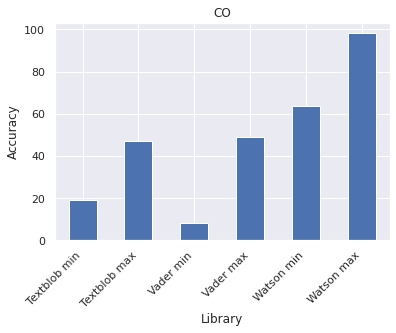

In [ ]:
sns.set()

fig = lib_min_max[0].iloc[2].plot(kind='bar')
plt.title(lib_min_max[0].iloc[2].name)
plt.ylabel('Accuracy')
plt.xlabel('Library')
fig.set_xticklabels(lib_min_max[0].columns, rotation = 45, ha="right")
plt.show()

#Test Area
Test on this part if you want to try out code or varaibles or anything of such

In [ ]:
track_name= "grandson war"
track_link= get_track_link(track_name) #uncomment to activate function
track_link

'grandson%20war'

In [ ]:
lyric_element = get_lyric_element(track_link,"default")
lyric_element

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


['https://www.musixmatch.com/lyrics/Grandson/War']
[[0, 'Grandson', 'War']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: use options instead of chrome_options


"Until the philosophy, we chose one race superior\nAnd another\nInferior He's finally\nAnd permanently\nDiscredited and abandoned\n\nAnd it's war in the east\nWar in the west\nWar up north\nWar down south\n\nAnd it's war in the east\nWar in the west\nWar up north\nWar down south\n\nEverywhere is war\nIt's a war\nOh, everywhere is war\nIt's a war\n\nAnd until there's no longer\nFirst and second class citizens of any nation\nIt's on\nAnd until the color of a man's skin serves no more significance\nThan the color of his eyes\nWe say war\n\nAnd it's war in the east\nWar in the west\nWar up north\nWar down south\n\nAnd it's war in the east\nWar in the west\nWar up north\nWar down south\nEverywhere is\nOh, everywhere is war\n\nIt's a war\nOh, everywhere is war\nIt's a war\nOh, everywhere is war\n\nLa, la, la, la, la, la, la\nLa, la, la, la, la, la, la\n(Everywhere is, everywhere is, everywhere is)\n(Everywhere is, everywhere is, everywhere is)\n\nEverywhere is war\nEverywhere is war"

In [ ]:
lyrics_as_array= filter_raw_lyrics(lyric_element)
lyrics=convert_arr_to_str(lyrics_as_array) #returns a single string as lyrics
lyrics,lyrics_as_array

In [ ]:
lyrics_as_array_without_sw = remove_stopword(lyrics_as_array)
lyrics_without_sw = convert_arr_to_str(lyrics_as_array_without_sw)
lyrics_as_array_without_sw,lyrics_without_sw

In [ ]:
lyrics_as_array_without_contraction = remove_contraction(lyrics_as_array)
lyrics_without_contraction = convert_arr_to_str(lyrics_as_array_without_contraction)
lyrics_as_array_without_contraction,lyrics_without_contraction

In [ ]:
lyrics_as_array_with_lemmatized_words=lemmatize_words(lyrics_as_array)
lyrics_with_lemmatized_words=convert_arr_to_str(lyrics_as_array_with_lemmatized_words)
lyrics_as_array_with_lemmatized_words,lyrics_with_lemmatized_words

In [ ]:
get_vader_score(lyrics)

In [ ]:
get_textblob_score(lyrics)

In [ ]:
get_watson_score(lyrics)

In [ ]:

list_of_converted_lyr_arr=get_lyric_arrays(lyrics_as_array) #returns a tuple with 3 items lyrics, lyrics without stop wordsm 
list_of_converted_lyr=get_lyrics(list_of_converted_lyr_arr)

In [ ]:
df=pd.DataFrame(index=["Lyrics","SW","CO","LM","SW-CO","SW-LM","CO-LM","SW-CO-LM"],columns=["Textblob","Textblob per line","Textblob nonzero","Vader","Vader per line","Vader nonzero","Watson","Watson per line","Watson nonzero"])
df

In [ ]:
df["Textblob"]=list(map(get_textblob_score,list_of_converted_lyr))
df["Vader"]=list(map(get_vader_score,list_of_converted_lyr))
df["Watson"]=list(map(get_watson_score,list_of_converted_lyr))

In [ ]:
textblob_per_line=[]
for trans in list_of_converted_lyr_arr:
  textblob_per_line.append(list(map(get_textblob_score,trans)))

df["Textblob per line"]=list(map(np.mean,textblob_per_line))
#textblob_per_line

In [ ]:
vader_per_line=[]
for trans in list_of_converted_lyr_arr:
  vader_per_line.append(list(map(get_vader_score,trans)))

df["Vader per line"]=list(map(np.mean,vader_per_line))
#vader_per_line

In [ ]:
converted_watson_arr=list(map(watson_min_words_arr,list_of_converted_lyr_arr))
converted_watson_arr

In [ ]:
converted_watson_arr=list(map(watson_min_words_arr,list_of_converted_lyr_arr))

watson_per_line=[]
for trans in converted_watson_arr:
  watson_per_line.append(list(map(get_watson_score,trans)))

df["Watson per line"]=list(map(np.mean,watson_per_line))
#watson_per_line

In [ ]:
print(len(watson_per_line),len(converted_watson_arr))
for i in range(8):
  print(len(watson_per_line[i]),len(converted_watson_arr[i]))

In [ ]:
df["Textblob nonzero"]=list(map(mean_without_zero,textblob_per_line))
df["Vader nonzero"]=list(map(mean_without_zero,vader_per_line))
df["Watson nonzero"]=list(map(mean_without_zero,watson_per_line))

In [ ]:
lyric_element = get_lyric_element(track_link,"default")
lyric_element

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [ ]:
lyrics_as_array= filter_raw_lyrics(lyric_element)
lyrics=convert_arr_to_str(lyrics_as_array) #returns a single string as lyrics
lyrics,lyrics_as_array

In [ ]:
lyrics_as_array_without_sw = remove_stopword(lyrics_as_array)
lyrics_without_sw = convert_arr_to_str(lyrics_as_array_without_sw)
lyrics_as_array_without_sw,lyrics_without_sw

In [ ]:
lyrics_as_array_without_contraction = remove_contraction(lyrics_as_array)
lyrics_without_contraction = convert_arr_to_str(lyrics_as_array_without_contraction)
lyrics_as_array_without_contraction,lyrics_without_contraction

In [ ]:
lyrics_as_array_with_lemmatized_words=lemmatize_words(lyrics_as_array)
lyrics_with_lemmatized_words=convert_arr_to_str(lyrics_as_array_with_lemmatized_words)
lyrics_as_array_with_lemmatized_words,lyrics_with_lemmatized_words

In [ ]:
get_vader_score(lyrics)

In [ ]:
get_textblob_score(lyrics)

In [ ]:
get_watson_score(lyrics)

In [ ]:

list_of_converted_lyr_arr=get_lyric_arrays(lyrics_as_array) #returns a tuple with 3 items lyrics, lyrics without stop wordsm 
list_of_converted_lyr=get_lyrics(list_of_converted_lyr_arr)

In [ ]:
df=pd.DataFrame(index=["Lyrics","SW","CO","LM","SW-CO","SW-LM","CO-LM","SW-CO-LM"],columns=["Textblob","Textblob per line","Textblob nonzero","Vader","Vader per line","Vader nonzero","Watson","Watson per line","Watson nonzero"])
df

In [ ]:
df["Textblob"]=list(map(get_textblob_score,list_of_converted_lyr))
df["Vader"]=list(map(get_vader_score,list_of_converted_lyr))
df["Watson"]=list(map(get_watson_score,list_of_converted_lyr))

In [ ]:
textblob_per_line=[]
for trans in list_of_converted_lyr_arr:
  textblob_per_line.append(list(map(get_textblob_score,trans)))

df["Textblob per line"]=list(map(np.mean,textblob_per_line))
#textblob_per_line

In [ ]:
vader_per_line=[]
for trans in list_of_converted_lyr_arr:
  vader_per_line.append(list(map(get_vader_score,trans)))

df["Vader per line"]=list(map(np.mean,vader_per_line))
#vader_per_line

In [ ]:
converted_watson_arr=list(map(watson_min_words_arr,list_of_converted_lyr_arr))

watson_per_line=[]
for trans in converted_watson_arr:
  watson_per_line.append(list(map(get_watson_score,trans)))

df["Watson per line"]=list(map(np.mean,watson_per_line))
#watson_per_line

In [ ]:
df["Textblob nonzero"]=list(map(mean_without_zero,textblob_per_line))
df["Vader nonzero"]=list(map(mean_without_zero,vader_per_line))
df["Watson nonzero"]=list(map(mean_without_zero,watson_per_line))